In [79]:
import os
import pickle
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.grid'] = True
%matplotlib widget

In [80]:
with open('training_data.pickle', 'rb') as f:
    training_data = pickle.load(f)
with open('training_labels.pickle', 'rb') as f:
    training_labels = pickle.load(f)
with open('exp_validation_data.pickle', 'rb') as f:
    ex_val_data = pickle.load(f)
with open('exp_validation_labels.pickle', 'rb') as f:
    ex_val_labels = pickle.load(f)
with open('exp_validation_trails.pickle', 'rb') as f:
    ex_val_trails = pickle.load(f)

In [81]:
train_cut = []
for i in range(len(training_data)):
    
    x = np.where(abs(training_data[i][:,1])>0.05)[0][0]
    y = np.where(abs(training_data[i][:,2])>0.05)[0][0]
    z = np.where(abs(training_data[i][:,3])>0.05)[0][0]
    p = np.where(abs(training_data[i][:,4])>0.05)[0][0]

    start = min(x,y,z,p)

    d = np.empty_like(training_data[i][start:,:])

    d[:,0] = training_data[i][start:, 0]
    d[:,1] = training_data[i][start:, 1]
    d[:,2] = training_data[i][start:, 2]
    d[:,3] = training_data[i][start:, 3]
    d[:,4] = training_data[i][start:, 4]

    train_cut.append(d)

In [82]:
ex_val_cut_data = []
for i in range(len(ex_val_data)):
    
    x = np.where(abs(ex_val_data[i][:,1])>0.05)[0][0]
    y = np.where(abs(ex_val_data[i][:,2])>0.05)[0][0]
    z = np.where(abs(ex_val_data[i][:,3])>0.05)[0][0]
    p = np.where(abs(ex_val_data[i][:,4])>0.05)[0][0]

    start = min(x,y,z,p)
    end = start+200

    d = np.empty_like(ex_val_data[i][start:end,:])

    d[:,0] = ex_val_data[i][start:end, 0]
    d[:,1] = ex_val_data[i][start:end, 1]
    d[:,2] = ex_val_data[i][start:end, 2]
    d[:,3] = ex_val_data[i][start:end, 4]
    d[:,4] = ex_val_data[i][start:end, 3]

    ex_val_cut_data.append(d)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
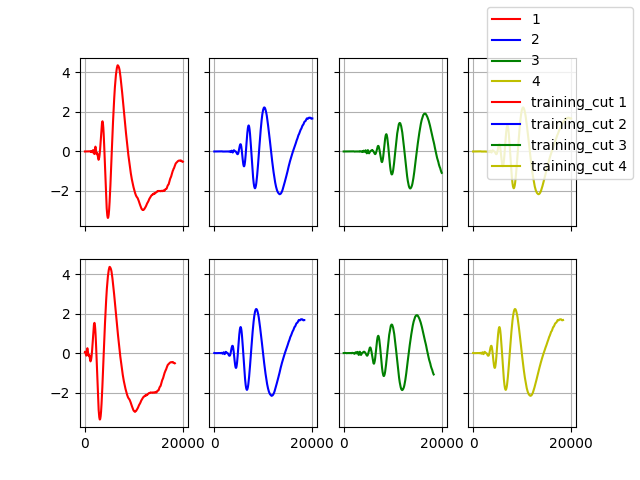

In [83]:
plt.close()
fig, axs = plt.subplots(2,4, sharex=True, sharey=True)

axs[0,0].plot(training_data[12][:,1], 'r', label='1')
axs[0,1].plot(training_data[12][:,2], 'b', label='2')
axs[0,2].plot(training_data[12][:,3], 'g', label='3')
axs[0,3].plot(training_data[12][:,4], 'y', label='4')

axs[1,0].plot(train_cut[12][:,1], 'r', label='training_cut 1')
axs[1,1].plot(train_cut[12][:,2], 'b', label='training_cut 2')
axs[1,2].plot(train_cut[12][:,3], 'g', label='training_cut 3')
axs[1,3].plot(train_cut[12][:,4], 'y', label='training_cut 4')

fig.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
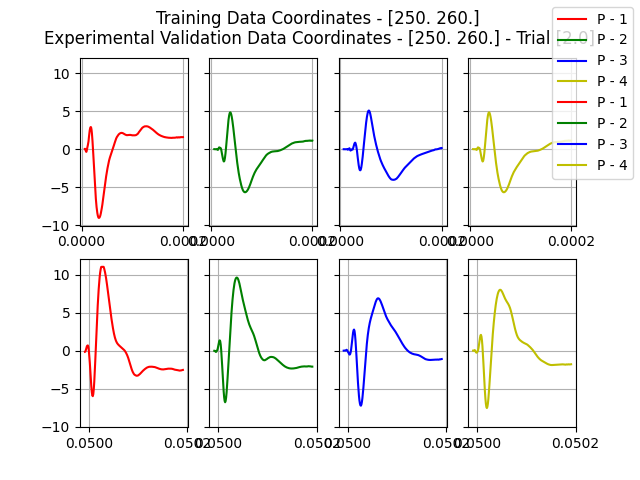

In [84]:
plt.close()
fig, axs = plt.subplots(2, 4, sharey=True)

ex_val_c = 17 # Given validation folder has 24 data points. so use - (0, 1, .... , 23)

# find out the index of the validation set in the training data
x = []
for i in range (0, len(training_labels)):
    if (training_labels[i][0] == ex_val_labels[ex_val_c][0]) and (training_labels[i][1] == ex_val_labels[ex_val_c][1]):
        x.append(i)

# plot to compare the validation set with the training set
fig.suptitle(f'Training Data Coordinates - {training_labels[x[0]]} \nExperimental Validation Data Coordinates - {ex_val_labels[ex_val_c]} - Trial [{ex_val_trails[ex_val_c]}]')

axs[0,0].plot(train_cut[x[0]][:,0], train_cut[x[0]][:,1], label='P - 1', c = 'r')
axs[0,1].plot(train_cut[x[0]][:,0], train_cut[x[0]][:,2], label='P - 2', c = 'g')
axs[0,2].plot(train_cut[x[0]][:,0], train_cut[x[0]][:,3], label='P - 3', c = 'b')
axs[0,3].plot(train_cut[x[0]][:,0], train_cut[x[0]][:,4], label='P - 4', c = 'y')

axs[1,0].plot(ex_val_cut_data[ex_val_c][:,0], ex_val_cut_data[ex_val_c][:,1], label='P - 1', c = 'r')
axs[1,1].plot(ex_val_cut_data[ex_val_c][:,0], ex_val_cut_data[ex_val_c][:,2], label='P - 2', c = 'g')
axs[1,2].plot(ex_val_cut_data[ex_val_c][:,0], ex_val_cut_data[ex_val_c][:,3], label='P - 3', c = 'b')
axs[1,3].plot(ex_val_cut_data[ex_val_c][:,0], ex_val_cut_data[ex_val_c][:,4], label='P - 4', c = 'y')

fig.legend()
plt.show()